Imports

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 60)
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV, StratifiedKFold
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score
from sklearn.metrics import ndcg_score, make_scorer, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, KBinsDiscretizer, MinMaxScaler
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, PolynomialFeatures
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_selection import SelectKBest, mutual_info_regression, VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.utils.class_weight import compute_class_weight, compute_sample_weight
from sklearn.compose import TransformedTargetRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor
from sklearn.svm import SVR, LinearSVR
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
from nltk.wsd import lesk
from nltk import ngrams
nltk.download('cmudict')
import csv
import matplotlib.pyplot as plt
from tqdm import tqdm
from itertools import combinations
import pickle5 as pkl
import json
import matplotlib.pyplot as plt
import os
import ast
import inspect
from utils import *
import re
from scipy.stats import rankdata, pearsonr, spearmanr, stats
from imblearn.over_sampling import SMOTE
import smogn
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.distributions.empirical_distribution import ECDF
from collections import Counter
import random
from scipy import stats
from functools import partial
import pylab as p
import mpl_toolkits.mplot3d.axes3d as p3
from xgboost import XGBRegressor
import math
from datamuse import datamuse
import urllib
import time
import requests
from functools import lru_cache
from itertools import product as iterprod
from mlxtend.feature_selection import SequentialFeatureSelector

In [1]:
import numpy as np
import pandas as pd
import pickle as pkl
import string
from collections import Counter
from utils import *
from nltk import ngrams
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from tqdm import tqdm

[nltk_data] Downloading package wordnet to /Users/pickle/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/pickle/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package cmudict to /Users/pickle/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


In [2]:
job = 'pickle'
path = './data/'+job
if not os.path.isdir(path): os.mkdir(path)
if not os.path.isdir(path+'/macbook/'): os.mkdir(path+'/macbook/')
if not os.path.isdir(path+'/colab/'): os.mkdir(path+'/colab/')

# Extract discovery features
- Run `gigaword_for_single.py`.
- Combine `{name}_{feature_name}.tsv`'s into `{name}_y.tsv`.
- Create log-transformed features.

In [ ]:
join_discovery_features(job, 'single_train')
join_discovery_features(job, 'single_trial')
join_discovery_features(job, 'single_test')

In [ ]:
single_train = pd.read_csv('./data/'+job+'/single_train_y.tsv', sep='\t', index_col=0)
single_trial = pd.read_csv('./data/'+job+'/single_trial_y.tsv', sep='\t', index_col=0)
single_test = pd.read_csv('./data/'+job+'/single_test_y.tsv', sep='\t', index_col=0)

In [9]:
config = {
    'case_sensitive': True,
    'stress_sensitive': True,
    'single_char_map_path': './data/'+job+'/single_char_map.pkl',
    'char_transition_map_path': './data/'+job+'/char_transitions_map.pkl',
    'phoneme_transition_map_path': './data/'+job+'/phoneme_transitions_map.pkl',
}

In [ ]:
save_other_features(single_train, config, job, 'single_train')
save_other_features(single_trial, config, job, 'single_trial')
save_other_features(single_test, config, job, 'single_test')

In [ ]:
log_transform(single_train, job, 'single_train', 'all')
log_transform(single_trial, job, 'single_trial', 'all')
log_transform(single_test, job, 'single_test', 'all')

# Join macbook and discovery features

In [ ]:
join_macbook_discovery_features(job, 'single_train')
join_macbook_discovery_features(job, 'single_trial')
join_macbook_discovery_features(job, 'single_test')

# Feature selection

In [ ]:
single_train = pd.read_csv('./data/'+job+'/single_train_j.tsv', sep='\t', index_col=0)
X = load_features_stacked(job, 'single_train')
y = single_train['complexity'].to_numpy()
single_trial = pd.read_csv('./data/'+job+'/single_trial_j.tsv', sep='\t', index_col=0)
X_trial = load_features_stacked(job, 'single_trial')
y_trial = single_trial['complexity'].to_numpy()
single_test = pd.read_csv('./data/'+job+'/single_test_j.tsv', sep='\t', index_col=0)
single_test_with_labels = pd.read_csv('./data/'+job+'/macbook/single_test_with_labels.tsv', sep='\t', quoting=csv.QUOTE_NONE, index_col=0)
single_test['complexity'] = single_test['id'].apply(lambda x: single_test_with_labels.loc[x]['complexity'])
X_test = load_features_stacked(job, 'single_test')
y_test = single_test['complexity'].to_numpy()

In [5]:
single_train_feature_name_2_idx = load_feature_name_2_idx(job, 'single_train')
single_train_feature_idx_2_name = {idx: feature_name for feature_name, idx in single_train_feature_name_2_idx.items()}
single_trial_feature_name_2_idx = load_feature_name_2_idx(job, 'single_trial')
single_trial_feature_idx_2_name = {idx: feature_name for feature_name, idx in single_trial_feature_name_2_idx.items()}
single_test_feature_name_2_idx = load_feature_name_2_idx(job, 'single_test')
single_test_feature_idx_2_name = {idx: feature_name for feature_name, idx in single_test_feature_name_2_idx.items()}

In [6]:
#single_train_mini_idx, single_dev_mini_idx = next(custom_cv_folds(single_train, n_splits=1, test_size=0.1))
single_train_mini_idx, single_dev_mini_idx = np.load('./data/'+job+'/single_train_mini_idx.npy'), np.load('./data/'+job+'/single_dev_mini_idx.npy')
single_train_mini = single_train.iloc[single_train_mini_idx]
single_dev_mini = single_train.iloc[single_dev_mini_idx]
#np.save('./data/pickle/single_train_mini_idx', single_train_mini_idx)
#np.save('./data/pickle/single_dev_mini_idx', single_dev_mini_idx)
#preprocess_for_bert(single_train_mini, './data/'+job+'/colab/single_train_bert.tsv', do_round=False)
#preprocess_for_bert(single_dev_mini, './data/'+job+'/colab/single_dev_bert.tsv', do_round=False)

In [7]:
X_train_mini = X[single_train_mini_idx, :]
X_dev_mini = X[single_dev_mini_idx, :]
y_train_mini = y[np.array(single_train_mini_idx)]
y_dev_mini = y[np.array(single_dev_mini_idx)]

## Filter method: K-best by mutual information
- Alternative script in `feature_selection_single.py`.
- Results below _supposedly_ same as that in `single_train_mi.txt`.

In [8]:
feature_names, mi = get_sorted_mi('./data/'+job+'/single_train_mi.txt')

In [9]:
k_lst, pearson_lst = [], []

In [16]:
for k in tqdm(np.arange(501, -1, -2)):
    k_lst.append(k)
    picks = feature_names[:k]
    col_idx = [single_train_feature_name_2_idx[pick] for pick in picks]
    X_train_mini_picks = X_train_mini[:, col_idx]
    X_dev_mini_picks = X_dev_mini[:, col_idx]
    model = LinearRegression()
    model = model.fit(X_train_mini_picks, y_train_mini)
    y_dev_mini_pred = model.predict(X_dev_mini_picks)
    pearson_lst.append(pearson(y_dev_mini_pred, y_dev_mini))

  0%|          | 0/251 [00:00<?, ?it/s]

In [21]:
pkl.dump((feature_names, mi, k_lst, pearson_lst, single_train_feature_name_2_idx, X_train_mini, X_dev_mini, y_train_mini, y_dev_mini), open('stuff.pkl', 'wb'))

In [ ]:
plt.plot(k_lst, pearson_lst)
plt.title('Filter method: k-best features by mutual information')
plt.xlabel('k')
plt.ylabel('Pearson')

- Run overnight to get graph.
- See graph in feature_selection_single.ipynb for what it should look like.

In [9]:
picks = feature_names[:300]

## Filter method: Remove constant and quasi-constant features

In [11]:
# combined_pred_complexity
picks = [pick for pick in picks if X[:, single_train_feature_name_2_idx[pick]].std() != 0]
# remove quasi-constant features
col_idx = np.array([single_train_feature_name_2_idx[pick] for pick in picks])
selector = VarianceThreshold(threshold=0.01)  # 0.1 indicates 99% of observations approximately
_ = selector.fit(X[:, col_idx])  # fit finds the features with low variance
picks = [pick for i, pick in enumerate(picks) if selector.get_support()[i]]

## Wrapped methods: Forward feature selection

In [72]:
col_idx = [single_train_feature_name_2_idx[pick] for pick in picks]
X_picks = X[:, col_idx]

In [17]:
model = LinearRegression()
sfs = SequentialFeatureSelector(model,
    k_features=20,
    forward=True,
    floating=False,
    scoring=make_scorer(pearson),
    verbose=2,
    cv=list(custom_cv_folds(single_train, n_splits=10)),
)

In [42]:
pkl.dump(picks, open('./picks.pkl', 'wb'))

In [14]:
picks = ['tf_lemma', 'log_CDcount', 'log_SUBTLWF', 'log_tf_lemma',
       'glove_word_277', 'log_tf_summed_bpe', 'log_google_ngram_2_head',
       'glove_word_151', 'glove_word_279', 'tfidf', 'glove_word_268',
       'elmo_word_541', 'elmo_word_726', 'is_acronym', 'elmo_word_646',
       'glove_word_284', 'glove_word_285', 'elmo_word_209',
       'glove_word_33', 'elmo_word_99']

In [133]:
col_idx = np.array([single_train_feature_name_2_idx[pick] for pick in picks])
X_picks = X[:, col_idx]
col_trial_idx = np.array([single_trial_feature_name_2_idx[pick] for pick in picks])
X_trial_picks = X_trial[:, col_trial_idx]
col_test_idx = np.array([single_test_feature_name_2_idx[pick] for pick in picks])
X_test_picks = X_test[:, col_test_idx]

In [134]:
scaler = StandardScaler()
X_picks_scaled = scaler.fit_transform(X_picks)
X_trial_picks_scaled = scaler.transform(X_trial_picks)
X_test_picks_scaled = scaler.transform(X_test_picks)

In [135]:
model = LinearRegression()
model = model.fit(X_picks_scaled, y)
y_test_pred = model.predict(X_test_picks_scaled)
pearson(y_test_pred, y_test), spearman(y_test_pred, y_test), MAE(y_test_pred, y_test)

(0.7347171323874796,
 0.6992978157901079,
 0.066904494871431,
 0.0074806166102936245,
 0.23884542626712923)

# Regression

In [12]:
col_idx = np.array([single_train_feature_name_2_idx[pick] for pick in picks])
X_picks = X[:, col_idx]
X_train_mini_picks = X_picks[single_train_mini_idx, :]
X_dev_mini_picks = X_picks[single_dev_mini_idx, :]
y_train_mini = y[np.array(single_train_mini_idx)]
y_dev_mini = y[np.array(single_dev_mini_idx)]
col_trial_idx = np.array([single_trial_feature_name_2_idx[pick] for pick in picks])
X_trial_picks = X_trial[:, col_trial_idx]
col_test_idx = np.array([single_test_feature_name_2_idx[pick] for pick in picks])
X_test_picks = X_test[:, col_test_idx]

In [13]:
scaler = StandardScaler()
X_picks_scaled = scaler.fit_transform(X_picks)
X_train_mini_picks_scaled = scaler.transform(X_train_mini_picks)
X_dev_mini_picks_scaled = scaler.transform(X_dev_mini_picks)
X_trial_picks_scaled = scaler.transform(X_trial_picks)
X_test_picks_scaled = scaler.transform(X_test_picks)

In [166]:
model = ElasticNet()
param_grid = {'alpha': [0.0001, 0.001, 0.01]}
'''
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['poly']}  
'''
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=custom_cv_folds(single_train, n_splits=5), scoring=make_scorer(pearson), verbose=3)
grid.fit(X_picks_scaled, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] alpha=0.0001 ....................................................
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] ........................ alpha=0.0001, score=0.779, total=   6.0s
[CV] alpha=0.0001 ....................................................
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s
[CV] ........................ alpha=0.0001, score=0.752, total=   6.1s
[CV] alpha=0.0001 ....................................................
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.1s remaining:    0.0s
[CV] ........................ alpha=0.0001, score=0.773, total=   6.1s
[CV] alpha=0.0001 ....................................................
[CV] ........................ alpha=0.0001, score=0.759, total=   5.7s
[CV] alpha=0.0001 ....................................................
[CV] ........................ alpha=0.0001, score=0.767, tot

GridSearchCV(cv=<generator object custom_cv_folds at 0x2af459c714c0>,
             estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01]},
             scoring=make_scorer(pearson), verbose=3)

In [167]:
grid.best_params_

{'alpha': 0.001}

In [153]:
model = Lasso(alpha=0.0001)
model = model.fit(X_picks_scaled, y)
#y_dev_mini_pred = model.predict(X_dev_mini_picks_scaled)
#y_trial_pred = model.predict(X_trial_picks_scaled)
y_test_pred = model.predict(X_test_picks_scaled)
pearson(y_test_pred, y_test), spearman(y_test_pred, y_test), MAE(y_test_pred, y_test)

(0.7351686534289513,
 0.7042463857183808,
 0.06668719227313334,
 0.007461470375622993,
 0.22980658462285708)

In [168]:
model = ElasticNet(alpha=0.001)
model = model.fit(X_picks_scaled, y)
#y_dev_mini_pred = model.predict(X_dev_mini_picks_scaled)
#y_trial_pred = model.predict(X_trial_picks_scaled)
y_test_pred = model.predict(X_test_picks_scaled)
pearson(y_test_pred, y_test), spearman(y_test_pred, y_test), MAE(y_test_pred, y_test)

(0.7396404711884631,
 0.7121954758366833,
 0.0661845949746085,
 0.007338469566219764,
 0.217735570817971)

In [170]:
model = LinearSVR(C=0.001)
model = model.fit(X_picks_scaled, y)
#y_dev_mini_pred = model.predict(X_dev_mini_picks_scaled)
#y_trial_pred = model.predict(X_trial_picks_scaled)
y_test_pred = model.predict(X_test_picks_scaled)
pearson(y_test_pred, y_test), spearman(y_test_pred, y_test), MAE(y_test_pred, y_test)

(0.7253546865163931,
 0.6969824804096161,
 0.06781379728359527,
 0.007723290677898873,
 0.15929340310193185)

In [172]:
model = SVR(kernel='rbf', C=1, gamma=0.001)
model = model.fit(X_picks_scaled, y)
#y_dev_mini_pred = model.predict(X_dev_mini_picks_scaled)
#y_trial_pred = model.predict(X_trial_picks_scaled)
y_test_pred = model.predict(X_test_picks_scaled)
pearson(y_test_pred, y_test), spearman(y_test_pred, y_test), MAE(y_test_pred, y_test)

(0.7391749864722357,
 0.7065774958207041,
 0.06675128290492309,
 0.007406711991926585,
 0.2889467191655142)

In [174]:
model = KNeighborsRegressor(n_neighbors=20, weights='distance')
model = model.fit(X_picks_scaled, y)
#y_dev_mini_pred = model.predict(X_dev_mini_picks_scaled)
#y_trial_pred = model.predict(X_trial_picks_scaled)
y_test_pred = model.predict(X_test_picks_scaled)
pearson(y_test_pred, y_test), spearman(y_test_pred, y_test), MAE(y_test_pred, y_test)

(0.7155880176171467,
 0.6913634497831548,
 0.07099634248379663,
 0.008250354614153983,
 0.2131585732679684)

In [14]:
model = XGBRegressor(colsample_bytree=0.7,learning_rate=0.03,max_depth=5,min_child_weight=4,n_estimators=225,nthread=4,objective='reg:linear',silent=1,subsample=0.7) # 1e-3 and 0.3 is optimal
#'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 225, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7
#model = model.fit(X_train_mini_picks_scaled, y_train_mini)
#y_dev_mini_pred = model.predict(X_dev_mini_picks_scaled)
#single_dev_mini['lr_pred_complexity'] = y_dev_mini_pred
model = model.fit(X_picks_scaled, y)
y_trial_pred = model.predict(X_trial_picks_scaled)
single_trial['lr_pred_complexity'] = y_trial_pred
y_test_pred = model.predict(X_test_picks_scaled)
single_test['lr_pred_complexity'] = y_test_pred
pearson(y_test_pred, y_test), spearman(y_test_pred, y_test), MAE(y_test_pred, y_test)

[15:58:29] WARNING: ../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:58:31] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




(0.7588645585282705, 0.7220168083102194, 0.06451765823582932)

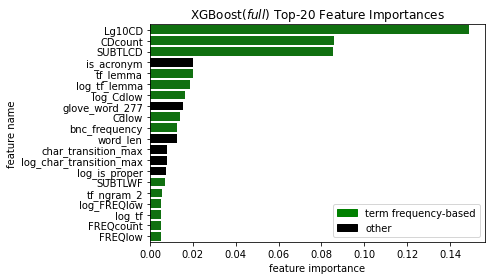

In [37]:
import matplotlib.patches as mpatches
i = 20
idx = np.argsort(model.feature_importances_)[::-1]
idx = np.array([j for j in idx if picks[j] not in ['log_FREQcount', 'log_CDcount']])
sns.reset_orig()
picks_mod = [pick.replace('pronoun', 'proper') if 'pronoun' in pick else pick for pick in picks]
term_frequency_based = set(['Lg10CD', 'CDcount', 'SUBTLCD', 'tf_lemma', 'log_tf_lemma', 'log_Cdlow', 'Cdlow', 'bnc_frequency', 'SUBTLWF', 'tf_ngram_2', 'log_FREQlow', 'log_tf', 'FREQcount', 'FREQlow'])
ax = sns.barplot(x=model.feature_importances_[idx][:i], y=np.array(picks_mod)[idx][:i], palette=['green' if p in term_frequency_based else 'black' for p in np.array(picks_mod)[idx][:i]])
ax.set_xlabel('feature importance')
ax.set_ylabel('feature name')
ax.set_title('XGBoost($\it{full}$) '+'Top-{} Feature Importances'.format(i))
ax.legend(handles=[mpatches.Patch(color='green', label='term frequency-based'), mpatches.Patch(color='black', label='other')])
#sns.set(rc={'figure.figsize':(11.7,8.27)})

In [13]:
y_dev_mini_pred = get_predictions_with_reduced_data(single_train_mini, X_train_mini_picks_scaled, y_train_mini, X_dev_mini_picks_scaled, frac_1=0.87, frac_2=0.95, frac_3=0.82, frac_4=0.0, frac_5=0.0, n=10)
single_dev_mini['lr_class_4_5_pred_complexity'] = y_dev_mini_pred
y_trial_pred = get_predictions_with_reduced_data(single_train, X_picks_scaled, y, X_trial_picks_scaled, frac_1=0.87, frac_2=0.95, frac_3=0.82, frac_4=0.0, frac_5=0.0, n=10)
single_trial['lr_class_4_5_pred_complexity'] = y_trial_pred
y_test_pred = get_predictions_with_reduced_data(single_train, X_picks_scaled, y, X_test_picks_scaled, frac_1=0.87, frac_2=0.95, frac_3=0.82, frac_4=0.0, frac_5=0.0, n=10)
single_test['lr_class_4_5_pred_complexity'] = y_test_pred

  0%|          | 0/10 [00:00<?, ?it/s][04:46:46] WARNING: ../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[04:46:46] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


 10%|█         | 1/10 [00:10<01:32, 10.23s/it][04:46:57] WARNING: ../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[04:46:57] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


 20%|██        | 2/10 [00:

In [189]:
y_test_pred = pkl.load(open('./single_test_lr_class_4_5_pred_complexity.pkl', 'rb'))
single_test['lr_class_4_5_pred_complexity'] = y_test_pred

In [14]:
pearson(y_test_pred, y_test), spearman(y_test_pred, y_test), MAE(y_test_pred, y_test)

(0.7453432713508604, 0.7121766893648032, 0.07508411120920254)

# Ensemble

In [234]:
best_pearson, best_thresh = 0.0, 0.0
pearsons, threshs = [], []
lr_pred_complexity = single_dev_mini['lr_pred_complexity'].to_numpy()
lr_class_4_5_pred_complexity = single_dev_mini['lr_class_4_5_pred_complexity'].to_numpy()
for thresh in tqdm(np.arange(0, 1, 0.01)):
    combined = lr_pred_complexity.copy()
    for i in range(len(combined)):
        if combined[i] > thresh:
            combined[i] = lr_class_4_5_pred_complexity[i]
    p = pearson(combined, y_dev_mini)
    pearsons.append(p); threshs.append(thresh)
    if p > best_pearson:
        best_pearson, best_thresh = p, thresh
best_pearson, best_thresh

100%|██████████| 100/100 [00:00<00:00, 181.89it/s]


(0.7988480197365982, 0.59)

In [ ]:
best_pearson, best_thresh = 0.0, 0.0
pearsons, threshs = [], []
lr_pred_complexity = single_dev_mini['lr_pred_complexity'].to_numpy()
lr_class_4_5_pred_complexity = single_dev_mini['lr_class_4_5_pred_complexity'].to_numpy()
for thresh in tqdm(np.arange(0, 1, 0.01)):
    combined = lr_pred_complexity.copy()
    for i in range(len(combined)):
        if combined[i] > thresh:
            combined[i] = lr_class_4_5_pred_complexity[i]
    p = pearson(combined, y_dev_mini)
    pearsons.append(p); threshs.append(thresh)
    if p > best_pearson:
        best_pearson, best_thresh = p, thresh
best_pearson, best_thresh

In [235]:
single_trial['lr_combined_pred_complexity'] = [pred_complexity if pred_complexity < best_thresh else single_trial['lr_class_4_5_pred_complexity'].to_numpy()[i] for i, pred_complexity in enumerate(single_trial['lr_pred_complexity'].to_numpy())]
single_test['lr_combined_pred_complexity'] = [pred_complexity if pred_complexity < best_thresh else single_test['lr_class_4_5_pred_complexity'].to_numpy()[i] for i, pred_complexity in enumerate(single_test['lr_pred_complexity'].to_numpy())]

In [236]:
with open('./data/'+job+'/colab/single_trial_bert_scores.json', 'r') as file:
    single_trial_bert_scores = json.load(file)
    single_trial['bert_pred_complexity'] = single_trial_bert_scores['scores']
with open('./data/'+job+'/colab/single_test_bert_scores.json', 'r') as file:
    single_test_bert_scores = json.load(file)
    single_test['bert_pred_complexity'] = single_test_bert_scores['scores']

In [237]:
single_trial['mean_pred_complexity'] = single_trial[['lr_combined_pred_complexity', 'bert_pred_complexity']].mean(axis=1)
single_test['mean_pred_complexity'] = single_test[['lr_combined_pred_complexity', 'bert_pred_complexity']].mean(axis=1)

In [238]:
single_trial[['complexity', 'lr_pred_complexity', 'lr_class_4_5_pred_complexity', 'lr_combined_pred_complexity',  'bert_pred_complexity', 'mean_pred_complexity']].corr()

,complexity,lr_pred_complexity,lr_class_4_5_pred_complexity,lr_combined_pred_complexity,bert_pred_complexity,mean_pred_complexity
complexity,1.000000,0.802324,0.770824,0.802324,0.798325,0.825270
lr_pred_complexity,0.802324,1.000000,0.979824,1.000000,0.880175,0.966490
lr_class_4_5_pred_complexity,0.770824,0.979824,1.000000,0.979824,0.859871,0.945614
lr_combined_pred_complexity,0.802324,1.000000,0.979824,1.000000,0.880175,0.966490
bert_pred_complexity,0.798325,0.880175,0.859871,0.880175,1.000000,0.972524
mean_pred_complexity,0.825270,0.966490,0.945614,0.966490,0.972524,1.000000


In [239]:
single_test[['complexity', 'lr_pred_complexity', 'lr_class_4_5_pred_complexity', 'lr_combined_pred_complexity',  'bert_pred_complexity', 'mean_pred_complexity']].corr()

,complexity,lr_pred_complexity,lr_class_4_5_pred_complexity,lr_combined_pred_complexity,bert_pred_complexity,mean_pred_complexity
complexity,1.000000,0.758865,0.745567,0.757604,0.748420,0.775105
lr_pred_complexity,0.758865,1.000000,0.976969,0.999208,0.886621,0.968647
lr_class_4_5_pred_complexity,0.745567,0.976969,1.000000,0.973775,0.864815,0.944399
lr_combined_pred_complexity,0.757604,0.999208,0.973775,1.000000,0.886603,0.969030
bert_pred_complexity,0.748420,0.886621,0.864815,0.886603,1.000000,0.973363
mean_pred_complexity,0.775105,0.968647,0.944399,0.969030,0.973363,1.000000


In [240]:
mean_pred_complexity = single_test['mean_pred_complexity']
pearson(mean_pred_complexity, y_test), spearman(mean_pred_complexity, y_test), MAE(mean_pred_complexity, y_test)

(0.7751048552386798,
 0.7291508425987947,
 0.0627455241064616,
 0.006467557897268365,
 0.3355435866335261)

# Playground

## Skewness of features

In [ ]:
skewness = []
for i in tqdm(range(X.shape[1])):
    skewness.append(stats.skew(X[:,i]))

skewness = [item for i, item in enumerate(skewness) if not feature_names[i].startswith('glove') and not feature_names[i].startswith('infersent') and not feature_names[i].startswith('elmo')]

stats.skew(skewness)

## Transition probabilities

In [123]:
data = pd.read_csv('/Users/pickle/cs99/BigGreen-at-LCP-2021/macbook/data/pickle/single_train_p.tsv', sep='\t', index_col=0)[['token', 'complexity']]
temp = pd.read_csv('/Users/pickle/cs99/BigGreen-at-LCP-2021/macbook/data/pickle/single_trial_p.tsv', sep='\t', index_col=0)[['token', 'complexity']]
data = data.append(temp)
data = data.groupby('token').mean()
data['class'] = pd.cut(data['complexity'], labels=[1,2,3,4,5], bins=[0,0.2,0.4,0.6,0.8,1], include_lowest=True)
data.reset_index(level=0, inplace=True)

In [124]:
for idx, row in data.iterrows():
    if data.loc[idx]['class'] == 5:
        data.at[idx, 'class'] = 4

In [125]:
single_char_mapping = pkl.load(open(config['single_char_map_path'], 'rb'))
single_char_transition = get_single_char_transition(single_char_mapping)
char_mapping = pkl.load(open(config['char_transition_map_path'], 'rb'))
char_transition = get_char_transition(char_mapping, case_sensitive=config['case_sensitive'])
data['char_transition_lst'] = data['token'].apply(lambda x: [char_transition.loc[char_1 if config['case_sensitive'] else char_1.lower()][char_2 if config['case_sensitive'] else char_2.lower()] for char_1, char_2 in ngrams(x, 2)] if len(list(ngrams(x, 2))) != 0 else [single_char_transition.loc[x]['[SEP]']])
data['char_transition_min'] = data['char_transition_lst'].apply(lambda x: min(x))
data['char_transition_max'] = data['char_transition_lst'].apply(lambda x: max(x))
data['char_transition_mean'] = data['char_transition_lst'].apply(lambda x: np.mean(x))
data['char_transition_std'] = data['char_transition_lst'].apply(lambda x: np.std(x))

In [127]:
cls_2_char_transition_counter = {i:Counter() for i in range(1, 4+1)}
cls_2_char_transition_lst = {i:{} for i in range(1, 4+1)}
cls_2_seen = {i:set() for i in range(1, 4+1)}
cls_2_number_of_bigrams = {i:0 for i in range(1, 4+1)}
bigram_2_examples = {}
for idx, row in tqdm(data.iterrows()):
    token = row['token']
    cls = row['class']
    if token in cls_2_seen[cls]: continue
    cls_2_seen[cls].add(token)
    target = cls_2_char_transition_counter[cls]
    bigrams = [(char_1 if config['case_sensitive'] else char_1.lower(), char_2 if config['case_sensitive'] else char_2.lower()) for char_1, char_2 in ngrams(token, 2)] if len(list(ngrams(token, 2))) != 0 else [(token, '[SEP]')]
    target.update(bigrams)
    another_counter = Counter()
    another_counter.update(bigrams)
    for bigram in set(bigrams):
        if bigram not in cls_2_char_transition_lst[cls]:
            cls_2_char_transition_lst[cls][bigram] = []
        cls_2_char_transition_lst[cls][bigram].append(another_counter[bigram])
    for bigram in set(bigrams):
        if bigram not in bigram_2_examples:
            bigram_2_examples[bigram] = {}
        if cls not in bigram_2_examples[bigram]:
            bigram_2_examples[bigram][cls] = []
        bigram_2_examples[bigram][cls].append(token)
    cls_2_number_of_bigrams[cls] += len(bigrams)

3699it [00:00, 6741.39it/s]


In [158]:
df = pd.DataFrame(columns=range(1,4+1), index=pd.MultiIndex.from_tuples(bigram_2_examples.keys()), dtype=float)
for cls, counter in cls_2_char_transition_counter.items():
    table = {}
    for ((x, y), count) in counter.most_common():
        if x not in table:
            table[x] = 0
        table[x] += count
    for ((x, y), count) in counter.most_common():
        df.at[(x, y), cls] = count/table[x]
df['char_transition_prob'] = [char_transition.loc[x, y] if y != '[SEP]' else single_char_transition.loc[x, y] for x, y in df.index]

In [161]:
df['statistic'] = np.nan
df['pvalue'] = np.nan
for transition in tqdm(df.index):
    if transition in cls_2_char_transition_lst[1] and transition in cls_2_char_transition_lst[2] and transition in cls_2_char_transition_lst[4]:
        statistic, pvalue = stats.ttest_ind(np.array(cls_2_char_transition_lst[1][transition] + cls_2_char_transition_lst[2][transition]), cls_2_char_transition_lst[4][transition], alternative='less')
        df.at[transition, 'statistic'] = statistic
        df.at[transition, 'pvalue'] = pvalue

  0%|          | 0/725 [00:00<?, ?it/s]/Users/pickle/.pyenv/versions/3.9.2/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/pickle/.pyenv/versions/3.9.2/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 725/725 [00:00<00:00, 5868.21it/s]


In [163]:
results = df[df['pvalue'] < 0.1].sort_values('pvalue', ascending=True)
results.rename(columns={1:'Class 1', 2:'Class 2', 3:'Class 3', 4:'Class 4, 5', 'statistic': 'T-Statistic', 'pvalue': 'P-Value'}, inplace=True)
results.round(4)

Class 1  Class 2  Class 3  Class 4, 5  char_transition_prob  T-Statistic  \
i d   0.0331   0.0297   0.0318      0.0588                0.0597      -7.3532   
o s   0.0200   0.0296   0.0747      0.0976                0.0402      -4.4796   
  r   0.1233   0.1471   0.1264      0.1463                0.1568      -2.1475   
y c   0.0500   0.0690      NaN      0.3333                0.0129      -1.8898   
p h   0.0156   0.0366   0.1129      0.4500                0.0206      -1.5407   
o n   0.2700   0.3591   0.3506      0.1707                0.2079      -1.4155   
i t   0.0783   0.1063   0.1292      0.2353                0.1084      -1.4036   
e s   0.2019   0.2142   0.1915      0.2143                0.1255      -1.2893   

     P-Value  
i d   0.0000  
o s   0.0000  
  r   0.0164  
y c   0.0587  
p h   0.0682  
o n   0.0788  
i t   0.0810  
e s   0.0990

In [180]:
char_transition.loc['e'].sort_values(ascending=False)

r    1.967712e-01
n    1.281935e-01
s    1.254875e-01
d    1.169716e-01
a    7.375771e-02
l    4.894921e-02
c    4.375107e-02
t    4.064273e-02
e    3.922432e-02
m    2.995752e-02
v    2.086499e-02
p    1.778392e-02
i    1.731606e-02
x    1.637163e-02
y    1.549029e-02
w    1.512595e-02
f    1.488811e-02
g    1.155882e-02
o    7.457603e-03
b    5.256983e-03
k    4.960464e-03
h    2.631223e-03
q    2.292462e-03
u    1.787450e-03
z    1.341514e-03
j    5.528743e-04
S    6.300373e-05
C    5.904470e-05
A    5.053131e-05
B    5.047012e-05
P    4.407846e-05
M    4.168552e-05
W    3.604135e-05
L    3.569737e-05
T    2.929744e-05
F    2.664156e-05
H    1.937673e-05
G    1.784703e-05
R    1.610566e-05
V    1.575507e-05
I    1.528375e-05
N    1.351096e-05
E    1.242777e-05
J    1.229712e-05
K    1.216648e-05
D    1.004474e-05
X    9.642887e-06
O    9.318757e-06
Y    7.334283e-06
U    3.479444e-06
Z    1.134457e-06
Q    9.988517e-07
Name: e, dtype: float64

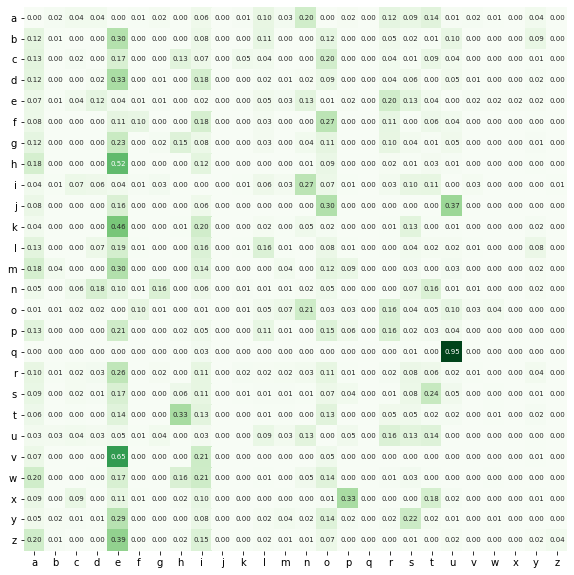

In [39]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(char_transition.loc[list(string.ascii_lowercase)][list(string.ascii_lowercase)], cmap="Greens", square=True, ax=ax, cbar=False, annot=True, fmt='.2f', annot_kws={"size": 7})
_ = plt.yticks(rotation=0)